# SVM - NSL

In [1]:
cd C:\\Users\\Sharuka Thirimanne\\Desktop\\FYP-ML-IDS

C:\Users\Sharuka Thirimanne\Desktop\FYP-ML-IDS


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix,f1_score

In [3]:
def load_train_dataset():
    df_train = pd.read_csv('NSL_train-set.csv')
    df_train = shuffle(df_train)
    
    limit = df_train.shape[1]-1
    
    X_train = df_train.iloc[:,0:limit]
    Y_train = df_train.iloc[:,limit]
    
    X_train.reset_index(inplace=True, drop=True)
    Y_train.reset_index(inplace=True, drop=True)
    
    return X_train, Y_train, df_train

X_train, Y_train, df_train = load_train_dataset()

In [4]:
def load_test_dataset():
    df_test = pd.read_csv('NSL_test-set.csv')
    df_test = shuffle(df_test)

    limit = df_test.shape[1]-1
    
    X_test = df_test.iloc[:,0:limit]
    Y_test = df_test.iloc[:,limit]
    
    X_test.reset_index(inplace=True, drop=True)
    Y_test.reset_index(inplace=True, drop=True)
    
    return X_test, Y_test, df_test

X_test, Y_test, df_test = load_test_dataset()

In [5]:
X_train, X_val , Y_train , Y_val = train_test_split(X_train,Y_train, test_size=0.2,stratify = Y_train,
                                                    shuffle=True,random_state=42)

print('Training X   :',X_train.shape)
print('Validation X :',X_val.shape)
print('Test_X       :',X_test.shape)
print('Training_Y   :',Y_train.shape)
print('Validation Y :',Y_val.shape)
print('Test_Y       :',Y_test.shape)

Training X   : (91459, 77)
Validation X : (22865, 77)
Test_X       : (22514, 77)
Training_Y   : (91459,)
Validation Y : (22865,)
Test_Y       : (22514,)


In [17]:
model = SVC(C= 19.5, gamma= 0.9).fit(X_train,Y_train)

In [19]:
model_poly = SVC(C= 7, kernel= 'poly',degree=4,gamma=0.5).fit(X_train,Y_train)

## RBF Kernel Pipeline

In [18]:
test_predictions = model.predict(X_test)

print('RBF Kernel')
print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(model, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(model.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions)*100))

RBF Kernel
Cross-Validation set accuracy: 99.4271 %
Train set accuracy           : 99.7682 %
Test set accuracy            : 80.2567 %


In [20]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions)))

Test set precision : 0.9276
Test set recall    : 0.7081
Test set F1-score  : 0.8031


## Poly Kernel Pipeline

In [21]:
test_predictions_poly = model_poly.predict(X_test)

print('Poly Kernel')
print("Cross-Validation set accuracy: {:.4f} %".format((cross_val_score(model_poly, X_val, Y_val, 
                                                                        cv=5,scoring='accuracy').mean())*100))
print("Train set accuracy           : {:.4f} %".format(model_poly.score(X_train,Y_train)*100))
print("Test set accuracy            : {:.4f} %".format(accuracy_score(Y_test, test_predictions_poly)*100))

Poly Kernel
Cross-Validation set accuracy: 99.5102 %
Train set accuracy           : 99.8349 %
Test set accuracy            : 80.7631 %


In [22]:
print("Test set precision : {:.4f}".format(precision_score(Y_test, test_predictions_poly)))
print("Test set recall    : {:.4f}".format(recall_score(Y_test, test_predictions_poly)))
print("Test set F1-score  : {:.4f}".format(f1_score(Y_test, test_predictions_poly)))

Test set precision : 0.9248
Test set recall    : 0.7203
Test set F1-score  : 0.8098


True Negatives  : 0.93
False Positives : 0.07
False Negatives : 0.29
True Positives  : 0.71


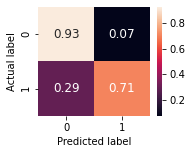

In [32]:
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions , normalize= 'true')
    plt.figure(figsize=(2.5,2))
    sns.heatmap(cm, annot=True, fmt=".2f",annot_kws={'size':12})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test,test_predictions)

True Negatives  : 0.92
False Positives : 0.08
False Negatives : 0.28
True Positives  : 0.72


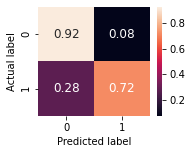

In [31]:
def plot_cm(labels, predictions):
    cm = confusion_matrix(labels, predictions, normalize= 'true')
    plt.figure(figsize=(2.5,2))
    sns.heatmap(cm, annot=True, fmt=".2f",annot_kws={'size':12})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives  : {:.2f}'.format(cm[0][0]))
    print('False Positives : {:.2f}'.format(cm[0][1]))
    print('False Negatives : {:.2f}'.format(cm[1][0]))
    print('True Positives  : {:.2f}'.format(cm[1][1]))
    
plot_cm(Y_test,test_predictions_poly)

True Negatives  : 0.98
False Positives : 0.02
False Negatives : 0.47
True Positives  : 0.53
True Negatives  : 0.97
False Positives : 0.03
False Negatives : 0.33
True Positives  : 0.67


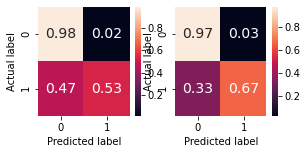

In [14]:
predictions = [test_predictions,test_predictions_poly]
kernel_names = ['RBF','Poly']

def plot_cm(labels, predictions,kernel_names, p=0.5):
    fig, axs = plt.subplots(nrows = 1,ncols = 2, figsize=(8, 3))
    for i in range(0,2): 
        pred = predictions[i]
        k_names = kernel_names[i]
        cm = confusion_matrix(labels, pred > p, normalize= 'true')
        sns.heatmap(cm, annot=True, fmt=".2f",ax=axs[i],annot_kws={'size':14})
        axs[i].set(xlabel='Predicted label',ylabel='Actual label',
                   title=str('Confusion matrix @{:.2f}'.format(p))+' '+ str(k_names))
        
        print('True Negatives  : {:.2f}'.format(cm[0][0]))
        print('False Positives : {:.2f}'.format(cm[0][1]))
        print('False Negatives : {:.2f}'.format(cm[1][0]))
        print('True Positives  : {:.2f}'.format(cm[1][1]))
        
plot_cm(Y_test, predictions,kernel_names)

In [25]:
print('RBF Kernel Classification Report')
print(classification_report(Y_test, test_predictions))
print('\n')
print('Poly Kernel Classification Report')
print(classification_report(Y_test, test_predictions_poly))

RBF Kernel Classification Report
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      9711
           1       0.93      0.71      0.80     12803

    accuracy                           0.80     22514
   macro avg       0.82      0.82      0.80     22514
weighted avg       0.83      0.80      0.80     22514



Poly Kernel Classification Report
              precision    recall  f1-score   support

           0       0.71      0.92      0.81      9711
           1       0.92      0.72      0.81     12803

    accuracy                           0.81     22514
   macro avg       0.82      0.82      0.81     22514
weighted avg       0.83      0.81      0.81     22514



In [15]:
param_grid = [
    {'gamma' : np.arange(0.1,1,0.1).tolist(),
     'C' : np.arange(0.5,20.0,0.5).tolist()},]

optimal_params = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring ='f1',
    cv=5,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 5 folds for each of 351 candidates, totalling 1755 fits
[CV] C=0.5, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=0.5, gamma=0.1, total=   5.5s
[CV] C=0.5, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] ................................. C=0.5, gamma=0.1, total=   5.4s
[CV] C=0.5, gamma=0.1 ................................................
[CV] ................................. C=0.5, gamma=0.1, total=   5.8s
[CV] C=0.5, gamma=0.1 ................................................
[CV] ................................. C=0.5, gamma=0.1, total=   5.6s
[CV] C=0.5, gamma=0.1 ................................................
[CV] ................................. C=0.5, gamma=0.1, total=   5.8s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   5.2s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   4.6s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   4.3s
[CV] C=0.5, gamma=0.2 ................................................
[CV] .

[CV] ................. C=1.0, gamma=0.30000000000000004, total=   4.3s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   4.2s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   4.3s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   4.5s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   4.3s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   4.4s
[CV] C=1.0, gamma=0.5 ................................................
[CV] ................................. C=1.0, gamma=0.5, total=   4.3s
[CV] C=1.0, gamma=0.5 ................................................
[CV] .

[CV] ................................. C=1.5, gamma=0.6, total=   4.5s
[CV] C=1.5, gamma=0.6 ................................................
[CV] ................................. C=1.5, gamma=0.6, total=   4.4s
[CV] C=1.5, gamma=0.6 ................................................
[CV] ................................. C=1.5, gamma=0.6, total=   4.5s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   4.5s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   4.5s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   4.8s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   4.5s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .

[CV] ................................. C=2.0, gamma=0.9, total=   4.9s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   4.8s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   5.0s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   5.0s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   5.0s
[CV] C=2.5, gamma=0.1 ................................................
[CV] ................................. C=2.5, gamma=0.1, total=   4.4s
[CV] C=2.5, gamma=0.1 ................................................
[CV] ................................. C=2.5, gamma=0.1, total=   4.2s
[CV] C=2.5, gamma=0.1 ................................................
[CV] .

[CV] ................................. C=3.0, gamma=0.2, total=   3.9s
[CV] C=3.0, gamma=0.2 ................................................
[CV] ................................. C=3.0, gamma=0.2, total=   3.9s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   3.9s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   3.7s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   3.8s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   3.8s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   3.8s
[CV] C=3.0, gamma=0.4 ................................................
[CV] .

[CV] ................................. C=3.5, gamma=0.5, total=   3.4s
[CV] C=3.5, gamma=0.5 ................................................
[CV] ................................. C=3.5, gamma=0.5, total=   3.7s
[CV] C=3.5, gamma=0.5 ................................................
[CV] ................................. C=3.5, gamma=0.5, total=   3.7s
[CV] C=3.5, gamma=0.5 ................................................
[CV] ................................. C=3.5, gamma=0.5, total=   3.5s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   3.7s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   3.8s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   3.8s
[CV] C=3.5, gamma=0.6 ................................................
[CV] .

[CV] .................. C=4.0, gamma=0.7000000000000001, total=   4.0s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   4.1s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   4.0s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   4.1s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   4.2s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   4.3s
[CV] C=4.0, gamma=0.9 ................................................
[CV] ................................. C=4.0, gamma=0.9, total=   4.3s
[CV] C=4.0, gamma=0.9 ................................................
[CV] .

[CV] ................................. C=5.0, gamma=0.1, total=   3.8s
[CV] C=5.0, gamma=0.1 ................................................
[CV] ................................. C=5.0, gamma=0.1, total=   3.8s
[CV] C=5.0, gamma=0.1 ................................................
[CV] ................................. C=5.0, gamma=0.1, total=   3.6s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   3.4s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   3.3s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   3.3s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   3.5s
[CV] C=5.0, gamma=0.2 ................................................
[CV] .

[CV] ................................. C=5.5, gamma=0.4, total=   2.9s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   3.0s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   3.0s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   2.9s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   3.0s
[CV] C=5.5, gamma=0.5 ................................................
[CV] ................................. C=5.5, gamma=0.5, total=   3.1s
[CV] C=5.5, gamma=0.5 ................................................
[CV] ................................. C=5.5, gamma=0.5, total=   3.1s
[CV] C=5.5, gamma=0.5 ................................................
[CV] .

[CV] ................................. C=6.0, gamma=0.6, total=   3.4s
[CV] C=6.0, gamma=0.6 ................................................
[CV] ................................. C=6.0, gamma=0.6, total=   3.2s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   3.5s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   3.5s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   3.4s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   3.6s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   3.7s
[CV] C=6.0, gamma=0.8 ................................................
[CV] .

[CV] ................................. C=6.5, gamma=0.9, total=   3.9s
[CV] C=6.5, gamma=0.9 ................................................
[CV] ................................. C=6.5, gamma=0.9, total=   4.4s
[CV] C=6.5, gamma=0.9 ................................................
[CV] ................................. C=6.5, gamma=0.9, total=   3.8s
[CV] C=6.5, gamma=0.9 ................................................
[CV] ................................. C=6.5, gamma=0.9, total=   3.9s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   3.1s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   3.1s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   3.3s
[CV] C=7.0, gamma=0.1 ................................................
[CV] .

[CV] ................................. C=7.5, gamma=0.2, total=   2.9s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.9s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.7s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   3.0s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.7s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   3.0s
[CV] C=7.5, gamma=0.4 ................................................
[CV] ................................. C=7.5, gamma=0.4, total=   2.8s
[CV] C=7.5, gamma=0.4 ................................................
[CV] .

[CV] ................................. C=8.0, gamma=0.5, total=   3.8s
[CV] C=8.0, gamma=0.5 ................................................
[CV] ................................. C=8.0, gamma=0.5, total=   3.2s
[CV] C=8.0, gamma=0.5 ................................................
[CV] ................................. C=8.0, gamma=0.5, total=   3.5s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   3.6s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   3.4s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   3.6s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   3.5s
[CV] C=8.0, gamma=0.6 ................................................
[CV] .

[CV] ................................. C=8.5, gamma=0.8, total=   3.8s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   4.1s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   3.8s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   4.1s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   3.9s
[CV] C=8.5, gamma=0.9 ................................................
[CV] ................................. C=8.5, gamma=0.9, total=   3.9s
[CV] C=8.5, gamma=0.9 ................................................
[CV] ................................. C=8.5, gamma=0.9, total=   4.1s
[CV] C=8.5, gamma=0.9 ................................................
[CV] .

[CV] ................................. C=9.5, gamma=0.1, total=   3.4s
[CV] C=9.5, gamma=0.1 ................................................
[CV] ................................. C=9.5, gamma=0.1, total=   3.4s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   3.1s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   3.2s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   3.0s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   3.3s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   3.1s
[CV] C=9.5, gamma=0.30000000000000004 ................................
[CV] .

[CV] ................................ C=10.0, gamma=0.4, total=   3.1s
[CV] C=10.0, gamma=0.4 ...............................................
[CV] ................................ C=10.0, gamma=0.4, total=   3.2s
[CV] C=10.0, gamma=0.4 ...............................................
[CV] ................................ C=10.0, gamma=0.4, total=   3.3s
[CV] C=10.0, gamma=0.4 ...............................................
[CV] ................................ C=10.0, gamma=0.4, total=   3.0s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   3.4s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   3.2s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   3.3s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] .

[CV] ................................ C=10.5, gamma=0.6, total=   4.0s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   4.0s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   4.1s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   3.9s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   4.0s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   4.8s
[CV] C=10.5, gamma=0.8 ...............................................
[CV] ................................ C=10.5, gamma=0.8, total=   4.2s
[CV] C=10.5, gamma=0.8 ...............................................
[CV] .

[CV] ................................ C=11.0, gamma=0.9, total=   3.9s
[CV] C=11.0, gamma=0.9 ...............................................
[CV] ................................ C=11.0, gamma=0.9, total=   3.9s
[CV] C=11.0, gamma=0.9 ...............................................
[CV] ................................ C=11.0, gamma=0.9, total=   4.0s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   3.4s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   3.2s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   3.5s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   3.5s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] .

[CV] ................ C=12.0, gamma=0.30000000000000004, total=   3.0s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   3.0s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   3.0s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   3.1s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   3.2s
[CV] C=12.0, gamma=0.4 ...............................................
[CV] ................................ C=12.0, gamma=0.4, total=   3.1s
[CV] C=12.0, gamma=0.4 ...............................................
[CV] ................................ C=12.0, gamma=0.4, total=   3.2s
[CV] C=12.0, gamma=0.4 ...............................................
[CV] .

[CV] ................................ C=12.5, gamma=0.5, total=   3.4s
[CV] C=12.5, gamma=0.5 ...............................................
[CV] ................................ C=12.5, gamma=0.5, total=   3.9s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   3.5s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   3.4s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   3.7s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   3.6s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   3.7s
[CV] C=12.5, gamma=0.7000000000000001 ................................
[CV] .

[CV] ................................ C=13.0, gamma=0.8, total=   3.7s
[CV] C=13.0, gamma=0.8 ...............................................
[CV] ................................ C=13.0, gamma=0.8, total=   4.3s
[CV] C=13.0, gamma=0.8 ...............................................
[CV] ................................ C=13.0, gamma=0.8, total=   4.8s
[CV] C=13.0, gamma=0.8 ...............................................
[CV] ................................ C=13.0, gamma=0.8, total=   4.7s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=   4.0s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=   4.1s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=   3.9s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] .

[CV] ................................ C=14.0, gamma=0.1, total=   3.5s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   3.3s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   3.5s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   3.5s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   3.6s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   3.4s
[CV] C=14.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=14.0, gamma=0.30000000000000004, total=   3.0s
[CV] C=14.0, gamma=0.30000000000000004 ...............................
[CV] .

[CV] ................................ C=14.5, gamma=0.4, total=   3.6s
[CV] C=14.5, gamma=0.4 ...............................................
[CV] ................................ C=14.5, gamma=0.4, total=   3.4s
[CV] C=14.5, gamma=0.4 ...............................................
[CV] ................................ C=14.5, gamma=0.4, total=   3.1s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   3.3s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   3.3s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   3.7s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   3.7s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] .

[CV] ................. C=15.0, gamma=0.7000000000000001, total=   3.9s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   3.7s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   4.0s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   3.9s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   3.9s
[CV] C=15.0, gamma=0.8 ...............................................
[CV] ................................ C=15.0, gamma=0.8, total=   3.8s
[CV] C=15.0, gamma=0.8 ...............................................
[CV] ................................ C=15.0, gamma=0.8, total=   4.4s
[CV] C=15.0, gamma=0.8 ...............................................
[CV] .

[CV] ................................ C=15.5, gamma=0.9, total=   4.4s
[CV] C=15.5, gamma=0.9 ...............................................
[CV] ................................ C=15.5, gamma=0.9, total=   4.5s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.7s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.6s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.7s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.9s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.3s
[CV] C=16.0, gamma=0.2 ...............................................
[CV] .

[CV] ................ C=16.5, gamma=0.30000000000000004, total=   2.8s
[CV] C=16.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=16.5, gamma=0.30000000000000004, total=   3.1s
[CV] C=16.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=16.5, gamma=0.30000000000000004, total=   2.8s
[CV] C=16.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=16.5, gamma=0.30000000000000004, total=   3.0s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   3.1s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   3.0s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   3.4s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] .

[CV] ................................ C=17.0, gamma=0.5, total=   3.2s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   3.3s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   3.3s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   3.5s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   3.3s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   3.5s
[CV] C=17.0, gamma=0.7000000000000001 ................................
[CV] ................. C=17.0, gamma=0.7000000000000001, total=   3.5s
[CV] C=17.0, gamma=0.7000000000000001 ................................
[CV] .

[CV] ................................ C=17.5, gamma=0.8, total=   3.9s
[CV] C=17.5, gamma=0.8 ...............................................
[CV] ................................ C=17.5, gamma=0.8, total=   3.7s
[CV] C=17.5, gamma=0.8 ...............................................
[CV] ................................ C=17.5, gamma=0.8, total=   3.9s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   4.1s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   4.1s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   4.9s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   4.0s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] .

[CV] ................................ C=18.5, gamma=0.2, total=   3.1s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   3.8s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   3.3s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   3.5s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   3.2s
[CV] C=18.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=18.5, gamma=0.30000000000000004, total=   3.7s
[CV] C=18.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=18.5, gamma=0.30000000000000004, total=   3.4s
[CV] C=18.5, gamma=0.30000000000000004 ...............................
[CV] .

[CV] ................................ C=19.0, gamma=0.4, total=   3.2s
[CV] C=19.0, gamma=0.4 ...............................................
[CV] ................................ C=19.0, gamma=0.4, total=   3.1s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.5s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.4s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.4s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.4s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.5s
[CV] C=19.0, gamma=0.6 ...............................................
[CV] .

[CV] ................. C=19.5, gamma=0.7000000000000001, total=   3.8s
[CV] C=19.5, gamma=0.7000000000000001 ................................
[CV] ................. C=19.5, gamma=0.7000000000000001, total=   3.9s
[CV] C=19.5, gamma=0.7000000000000001 ................................
[CV] ................. C=19.5, gamma=0.7000000000000001, total=   3.9s
[CV] C=19.5, gamma=0.7000000000000001 ................................
[CV] ................. C=19.5, gamma=0.7000000000000001, total=   4.0s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=   4.0s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=   4.3s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=   4.1s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 1755 out of 1755 | elapsed: 109.9min finished


{'C': 19.5, 'gamma': 0.9}


In [16]:
param_grid = [
    {'gamma' : np.arange(0.1,1,0.1).tolist(),
     'C' : np.arange(0.5,20.0,0.5).tolist()},]

optimal_params = GridSearchCV(
    estimator = model_poly,
    param_grid = param_grid,
    scoring ='f1',
    cv=5,
    verbose = 2
)

optimal_params.fit(X_val,Y_val)
print(optimal_params.best_params_)

Fitting 5 folds for each of 351 candidates, totalling 1755 fits
[CV] C=0.5, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................. C=0.5, gamma=0.1, total=   5.8s
[CV] C=0.5, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s


[CV] ................................. C=0.5, gamma=0.1, total=   5.5s
[CV] C=0.5, gamma=0.1 ................................................
[CV] ................................. C=0.5, gamma=0.1, total=   5.7s
[CV] C=0.5, gamma=0.1 ................................................
[CV] ................................. C=0.5, gamma=0.1, total=   5.4s
[CV] C=0.5, gamma=0.1 ................................................
[CV] ................................. C=0.5, gamma=0.1, total=   5.5s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   3.3s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   3.2s
[CV] C=0.5, gamma=0.2 ................................................
[CV] ................................. C=0.5, gamma=0.2, total=   3.4s
[CV] C=0.5, gamma=0.2 ................................................
[CV] .

[CV] ................. C=1.0, gamma=0.30000000000000004, total=   3.3s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   2.3s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   2.4s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   2.3s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   1.9s
[CV] C=1.0, gamma=0.4 ................................................
[CV] ................................. C=1.0, gamma=0.4, total=   2.1s
[CV] C=1.0, gamma=0.5 ................................................
[CV] ................................. C=1.0, gamma=0.5, total=   2.1s
[CV] C=1.0, gamma=0.5 ................................................
[CV] .

[CV] ................................. C=1.5, gamma=0.6, total=   1.9s
[CV] C=1.5, gamma=0.6 ................................................
[CV] ................................. C=1.5, gamma=0.6, total=   2.0s
[CV] C=1.5, gamma=0.6 ................................................
[CV] ................................. C=1.5, gamma=0.6, total=   1.9s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   1.6s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   2.1s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   2.0s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .................. C=1.5, gamma=0.7000000000000001, total=   1.8s
[CV] C=1.5, gamma=0.7000000000000001 .................................
[CV] .

[CV] ................................. C=2.0, gamma=0.9, total=   1.9s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   2.1s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   2.0s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   1.9s
[CV] C=2.0, gamma=0.9 ................................................
[CV] ................................. C=2.0, gamma=0.9, total=   1.9s
[CV] C=2.5, gamma=0.1 ................................................
[CV] ................................. C=2.5, gamma=0.1, total=   3.8s
[CV] C=2.5, gamma=0.1 ................................................
[CV] ................................. C=2.5, gamma=0.1, total=   3.5s
[CV] C=2.5, gamma=0.1 ................................................
[CV] .

[CV] ................................. C=3.0, gamma=0.2, total=   2.6s
[CV] C=3.0, gamma=0.2 ................................................
[CV] ................................. C=3.0, gamma=0.2, total=   2.6s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   2.0s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   2.3s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   2.2s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   2.2s
[CV] C=3.0, gamma=0.30000000000000004 ................................
[CV] ................. C=3.0, gamma=0.30000000000000004, total=   2.2s
[CV] C=3.0, gamma=0.4 ................................................
[CV] .

[CV] ................................. C=3.5, gamma=0.5, total=   2.0s
[CV] C=3.5, gamma=0.5 ................................................
[CV] ................................. C=3.5, gamma=0.5, total=   2.1s
[CV] C=3.5, gamma=0.5 ................................................
[CV] ................................. C=3.5, gamma=0.5, total=   1.9s
[CV] C=3.5, gamma=0.5 ................................................
[CV] ................................. C=3.5, gamma=0.5, total=   1.8s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   1.9s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   2.0s
[CV] C=3.5, gamma=0.6 ................................................
[CV] ................................. C=3.5, gamma=0.6, total=   1.8s
[CV] C=3.5, gamma=0.6 ................................................
[CV] .

[CV] .................. C=4.0, gamma=0.7000000000000001, total=   1.8s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   1.9s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   2.0s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   2.2s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   2.5s
[CV] C=4.0, gamma=0.8 ................................................
[CV] ................................. C=4.0, gamma=0.8, total=   2.0s
[CV] C=4.0, gamma=0.9 ................................................
[CV] ................................. C=4.0, gamma=0.9, total=   2.1s
[CV] C=4.0, gamma=0.9 ................................................
[CV] .

[CV] ................................. C=5.0, gamma=0.1, total=   3.6s
[CV] C=5.0, gamma=0.1 ................................................
[CV] ................................. C=5.0, gamma=0.1, total=   3.4s
[CV] C=5.0, gamma=0.1 ................................................
[CV] ................................. C=5.0, gamma=0.1, total=   3.6s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   2.5s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   2.5s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   2.8s
[CV] C=5.0, gamma=0.2 ................................................
[CV] ................................. C=5.0, gamma=0.2, total=   2.4s
[CV] C=5.0, gamma=0.2 ................................................
[CV] .

[CV] ................................. C=5.5, gamma=0.4, total=   2.4s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   2.5s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   2.1s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   2.0s
[CV] C=5.5, gamma=0.4 ................................................
[CV] ................................. C=5.5, gamma=0.4, total=   1.9s
[CV] C=5.5, gamma=0.5 ................................................
[CV] ................................. C=5.5, gamma=0.5, total=   1.7s
[CV] C=5.5, gamma=0.5 ................................................
[CV] ................................. C=5.5, gamma=0.5, total=   2.0s
[CV] C=5.5, gamma=0.5 ................................................
[CV] .

[CV] ................................. C=6.0, gamma=0.6, total=   2.1s
[CV] C=6.0, gamma=0.6 ................................................
[CV] ................................. C=6.0, gamma=0.6, total=   1.8s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   2.2s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   1.9s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   2.0s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   2.2s
[CV] C=6.0, gamma=0.7000000000000001 .................................
[CV] .................. C=6.0, gamma=0.7000000000000001, total=   1.8s
[CV] C=6.0, gamma=0.8 ................................................
[CV] .

[CV] ................................. C=6.5, gamma=0.9, total=   2.5s
[CV] C=6.5, gamma=0.9 ................................................
[CV] ................................. C=6.5, gamma=0.9, total=   2.0s
[CV] C=6.5, gamma=0.9 ................................................
[CV] ................................. C=6.5, gamma=0.9, total=   2.3s
[CV] C=6.5, gamma=0.9 ................................................
[CV] ................................. C=6.5, gamma=0.9, total=   2.3s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   3.3s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   3.3s
[CV] C=7.0, gamma=0.1 ................................................
[CV] ................................. C=7.0, gamma=0.1, total=   3.4s
[CV] C=7.0, gamma=0.1 ................................................
[CV] .

[CV] ................................. C=7.5, gamma=0.2, total=   2.7s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.2s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.2s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=7.5, gamma=0.30000000000000004 ................................
[CV] ................. C=7.5, gamma=0.30000000000000004, total=   2.2s
[CV] C=7.5, gamma=0.4 ................................................
[CV] ................................. C=7.5, gamma=0.4, total=   1.7s
[CV] C=7.5, gamma=0.4 ................................................
[CV] .

[CV] ................................. C=8.0, gamma=0.5, total=   2.1s
[CV] C=8.0, gamma=0.5 ................................................
[CV] ................................. C=8.0, gamma=0.5, total=   1.9s
[CV] C=8.0, gamma=0.5 ................................................
[CV] ................................. C=8.0, gamma=0.5, total=   1.8s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   1.8s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   2.2s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   2.1s
[CV] C=8.0, gamma=0.6 ................................................
[CV] ................................. C=8.0, gamma=0.6, total=   2.0s
[CV] C=8.0, gamma=0.6 ................................................
[CV] .

[CV] ................................. C=8.5, gamma=0.8, total=   2.0s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   2.4s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   2.2s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   2.1s
[CV] C=8.5, gamma=0.8 ................................................
[CV] ................................. C=8.5, gamma=0.8, total=   1.9s
[CV] C=8.5, gamma=0.9 ................................................
[CV] ................................. C=8.5, gamma=0.9, total=   2.4s
[CV] C=8.5, gamma=0.9 ................................................
[CV] ................................. C=8.5, gamma=0.9, total=   2.4s
[CV] C=8.5, gamma=0.9 ................................................
[CV] .

[CV] ................................. C=9.5, gamma=0.1, total=   3.0s
[CV] C=9.5, gamma=0.1 ................................................
[CV] ................................. C=9.5, gamma=0.1, total=   3.2s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   2.9s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   3.6s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   2.4s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   2.3s
[CV] C=9.5, gamma=0.2 ................................................
[CV] ................................. C=9.5, gamma=0.2, total=   2.3s
[CV] C=9.5, gamma=0.30000000000000004 ................................
[CV] .

[CV] ................................ C=10.0, gamma=0.4, total=   2.4s
[CV] C=10.0, gamma=0.4 ...............................................
[CV] ................................ C=10.0, gamma=0.4, total=   1.8s
[CV] C=10.0, gamma=0.4 ...............................................
[CV] ................................ C=10.0, gamma=0.4, total=   2.1s
[CV] C=10.0, gamma=0.4 ...............................................
[CV] ................................ C=10.0, gamma=0.4, total=   1.9s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   2.0s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   2.1s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] ................................ C=10.0, gamma=0.5, total=   1.9s
[CV] C=10.0, gamma=0.5 ...............................................
[CV] .

[CV] ................................ C=10.5, gamma=0.6, total=   1.9s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   2.2s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   2.2s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   1.8s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   2.0s
[CV] C=10.5, gamma=0.7000000000000001 ................................
[CV] ................. C=10.5, gamma=0.7000000000000001, total=   1.9s
[CV] C=10.5, gamma=0.8 ...............................................
[CV] ................................ C=10.5, gamma=0.8, total=   2.1s
[CV] C=10.5, gamma=0.8 ...............................................
[CV] .

[CV] ................................ C=11.0, gamma=0.9, total=   2.1s
[CV] C=11.0, gamma=0.9 ...............................................
[CV] ................................ C=11.0, gamma=0.9, total=   2.5s
[CV] C=11.0, gamma=0.9 ...............................................
[CV] ................................ C=11.0, gamma=0.9, total=   2.1s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   3.1s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   2.8s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   2.9s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] ................................ C=11.5, gamma=0.1, total=   2.9s
[CV] C=11.5, gamma=0.1 ...............................................
[CV] .

[CV] ................ C=12.0, gamma=0.30000000000000004, total=   1.8s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   2.1s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   2.0s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   1.8s
[CV] C=12.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=12.0, gamma=0.30000000000000004, total=   1.9s
[CV] C=12.0, gamma=0.4 ...............................................
[CV] ................................ C=12.0, gamma=0.4, total=   2.0s
[CV] C=12.0, gamma=0.4 ...............................................
[CV] ................................ C=12.0, gamma=0.4, total=   2.1s
[CV] C=12.0, gamma=0.4 ...............................................
[CV] .

[CV] ................................ C=12.5, gamma=0.5, total=   2.0s
[CV] C=12.5, gamma=0.5 ...............................................
[CV] ................................ C=12.5, gamma=0.5, total=   2.0s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   1.9s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   2.1s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   2.2s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   2.4s
[CV] C=12.5, gamma=0.6 ...............................................
[CV] ................................ C=12.5, gamma=0.6, total=   2.0s
[CV] C=12.5, gamma=0.7000000000000001 ................................
[CV] .

[CV] ................................ C=13.0, gamma=0.8, total=   2.4s
[CV] C=13.0, gamma=0.8 ...............................................
[CV] ................................ C=13.0, gamma=0.8, total=   2.4s
[CV] C=13.0, gamma=0.8 ...............................................
[CV] ................................ C=13.0, gamma=0.8, total=   2.6s
[CV] C=13.0, gamma=0.8 ...............................................
[CV] ................................ C=13.0, gamma=0.8, total=   2.1s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=   2.3s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=   2.4s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] ................................ C=13.0, gamma=0.9, total=   2.1s
[CV] C=13.0, gamma=0.9 ...............................................
[CV] .

[CV] ................................ C=14.0, gamma=0.1, total=   2.6s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   2.2s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   2.3s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   2.3s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   2.1s
[CV] C=14.0, gamma=0.2 ...............................................
[CV] ................................ C=14.0, gamma=0.2, total=   2.3s
[CV] C=14.0, gamma=0.30000000000000004 ...............................
[CV] ................ C=14.0, gamma=0.30000000000000004, total=   1.9s
[CV] C=14.0, gamma=0.30000000000000004 ...............................
[CV] .

[CV] ................................ C=14.5, gamma=0.4, total=   1.9s
[CV] C=14.5, gamma=0.4 ...............................................
[CV] ................................ C=14.5, gamma=0.4, total=   2.1s
[CV] C=14.5, gamma=0.4 ...............................................
[CV] ................................ C=14.5, gamma=0.4, total=   1.6s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   2.0s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   2.0s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   1.9s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] ................................ C=14.5, gamma=0.5, total=   2.1s
[CV] C=14.5, gamma=0.5 ...............................................
[CV] .

[CV] ................. C=15.0, gamma=0.7000000000000001, total=   2.0s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   2.1s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   2.0s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   2.4s
[CV] C=15.0, gamma=0.7000000000000001 ................................
[CV] ................. C=15.0, gamma=0.7000000000000001, total=   2.0s
[CV] C=15.0, gamma=0.8 ...............................................
[CV] ................................ C=15.0, gamma=0.8, total=   2.3s
[CV] C=15.0, gamma=0.8 ...............................................
[CV] ................................ C=15.0, gamma=0.8, total=   2.2s
[CV] C=15.0, gamma=0.8 ...............................................
[CV] .

[CV] ................................ C=15.5, gamma=0.9, total=   2.8s
[CV] C=15.5, gamma=0.9 ...............................................
[CV] ................................ C=15.5, gamma=0.9, total=   2.5s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.8s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.8s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.3s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   2.9s
[CV] C=16.0, gamma=0.1 ...............................................
[CV] ................................ C=16.0, gamma=0.1, total=   3.1s
[CV] C=16.0, gamma=0.2 ...............................................
[CV] .

[CV] ................ C=16.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=16.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=16.5, gamma=0.30000000000000004, total=   1.9s
[CV] C=16.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=16.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=16.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=16.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   2.0s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   2.0s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] ................................ C=16.5, gamma=0.4, total=   2.2s
[CV] C=16.5, gamma=0.4 ...............................................
[CV] .

[CV] ................................ C=17.0, gamma=0.5, total=   1.8s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   2.0s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   2.0s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   2.0s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   2.1s
[CV] C=17.0, gamma=0.6 ...............................................
[CV] ................................ C=17.0, gamma=0.6, total=   2.2s
[CV] C=17.0, gamma=0.7000000000000001 ................................
[CV] ................. C=17.0, gamma=0.7000000000000001, total=   2.4s
[CV] C=17.0, gamma=0.7000000000000001 ................................
[CV] .

[CV] ................................ C=17.5, gamma=0.8, total=   2.4s
[CV] C=17.5, gamma=0.8 ...............................................
[CV] ................................ C=17.5, gamma=0.8, total=   2.3s
[CV] C=17.5, gamma=0.8 ...............................................
[CV] ................................ C=17.5, gamma=0.8, total=   2.2s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   2.2s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   2.5s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   2.2s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] ................................ C=17.5, gamma=0.9, total=   2.7s
[CV] C=17.5, gamma=0.9 ...............................................
[CV] .

[CV] ................................ C=18.5, gamma=0.2, total=   2.0s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   2.2s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   2.3s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   2.3s
[CV] C=18.5, gamma=0.2 ...............................................
[CV] ................................ C=18.5, gamma=0.2, total=   2.2s
[CV] C=18.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=18.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=18.5, gamma=0.30000000000000004 ...............................
[CV] ................ C=18.5, gamma=0.30000000000000004, total=   2.1s
[CV] C=18.5, gamma=0.30000000000000004 ...............................
[CV] .

[CV] ................................ C=19.0, gamma=0.4, total=   2.0s
[CV] C=19.0, gamma=0.4 ...............................................
[CV] ................................ C=19.0, gamma=0.4, total=   1.8s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   2.4s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   2.7s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   2.8s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.3s
[CV] C=19.0, gamma=0.5 ...............................................
[CV] ................................ C=19.0, gamma=0.5, total=   3.2s
[CV] C=19.0, gamma=0.6 ...............................................
[CV] .

[CV] ................. C=19.5, gamma=0.7000000000000001, total=   2.4s
[CV] C=19.5, gamma=0.7000000000000001 ................................
[CV] ................. C=19.5, gamma=0.7000000000000001, total=   2.7s
[CV] C=19.5, gamma=0.7000000000000001 ................................
[CV] ................. C=19.5, gamma=0.7000000000000001, total=   3.0s
[CV] C=19.5, gamma=0.7000000000000001 ................................
[CV] ................. C=19.5, gamma=0.7000000000000001, total=   2.2s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=   2.4s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=   3.3s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] ................................ C=19.5, gamma=0.8, total=   2.4s
[CV] C=19.5, gamma=0.8 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done 1755 out of 1755 | elapsed: 67.5min finished


{'C': 7.0, 'gamma': 0.5}


c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


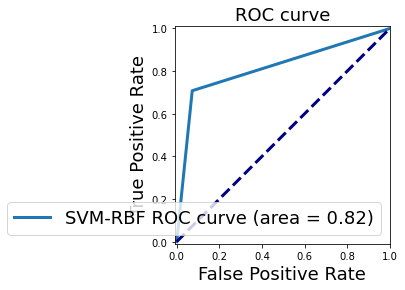

In [26]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='SVM-RBF ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

c:\users\sharuka thirimanne\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


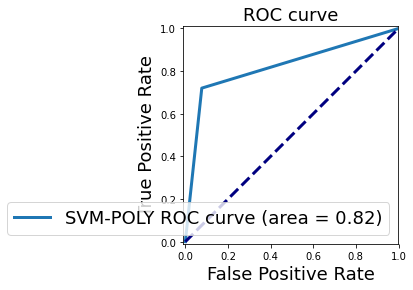

In [27]:
fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_predictions_poly)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='SVM-POLY ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC curve', fontsize=18)
plt.legend(loc='lower right', fontsize=18)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()